In [91]:
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Metodos de Runge-Kutta

Nesse capitulo vamos estudar as equações diferenciais ordinarias na seguinte forma

$$\frac{dy}{dx} = f(x,y)$$

Só para relmenbrar, nos capitulos anteriores, na hora de estudar o caso de paraquedista, se familiarizamos com o metodo de Euler. O metodo de Euler, era de seguinte forma geral
<p align="center">
Valor novo = valor anterio + inclinação x tamanho de passo.
</p>

ou em termos matematicos

$$y_{i+1} = y_i + \phi h$$

De acordo com essa equação, a estimativa da inclinação $\phi$ é usada para extrapolar de um
valor antigo $y_i$ para um valor novo $y_{i+1}$ em uma distância $h$. Essa fórmula pode ser aplicada passo a passo para cálculos no futuro e, portanto, para percorrer a trajetória da solução.

<p align="center">
<img src="./images/9-euler.jpg" width=350 height=350 />
</p>

## Metodo de Euler

No calculo um estudamos que a primeira derivada forcene uma estimativa direta da inclinação em $x_i$

$$\phi = f(x_i, y_i)$$

em que $f(x_i, y_i)$ é a equação diferencial calculada em $x_i$ e $y_i$. Essa estimativa pode ser substituída na equação geral

$$y_{i+1} = y_i + f(x_i, y_i)h$$

Essa fórmula é conhecida como método de Euler (ou Euler-Cauchy ou ponto-inclinação). Um novo valor de $y$ é previsto usando a inclinação (igual à primeira derivada no valor original de $x$) para extrapolar linearmente sobre um tamanho de passo $h$.

In [6]:
def euler(func, xi, yi, h=1):
    return yi + func(xi, yi) * h

**Exemplo:**

### Analise de Erro para o Metodo de Euler

## Melhorias para o Metodo de Euler

Uma fonte fundamental de erro no método de Euler é que supomos que a derivada no iní-
cio do intervalo pode ser usada no intervalo todo. Estão disponíveis duas modificações
simples para contornar essas deficiências. Ambas as modificações na verdade pertencem a uma classe maior de técnicas de solução chamadas métodos de Runge-Kutta. Entretanto, como elas têm uma interpretação gráfica muito simples, nós as apresentaremos antes de sua dedução formal como métodos de Runge-Kutta.

### Método de Heun

Um método de melhorar a estimativa da inclinação envolve a determinação de duas derivadas para o intervalo — uma no ponto inicial e outra no ponto final. Então, é feita a média das duas derivadas para obter uma estimativa melhorada da inclinação no intervalo todo. Essa abordagem, chamada de método de Heun, é descrita graficamente na figura abaixo

<p align="center">
<img src="./images/9-heun.jpg" width=350 height=600 />
</p>

Lembre-se de que, no método de Euler, a inclinação no início de um intervalo

$$y'_i = f(x_i, y_i)$$

é usada para extrapolar linearmente para $y_{i+1}$:

$$y^0_{i+1} = y_i + f(x_i, y_i)$$

No método de Euler padrão, pararíamos nesse ponto. No entanto, no método de Heun, o $y^0_{i+1}$
calculado na equação acima não é a resposta final, mas uma previsão intermediária. É por isso que o distinguimos com o sobrescrito `0`. A equação acima é chamada `equação preditora`. Ela fornece uma estimativa de $^0_{yi+1}$ que permite o cálculo de uma estimativa da
inclinação na extremidade final do intervalo:

$$y'_{i+1} = f(x_{i+1}, y^0_{i+1})$$

Assim, as duas inclinações, as ultimas duas equações acima, podem ser combinadas para
obter uma inclinação média no intervalo:

$$\bar{y}' = \frac{y'_i + y'_{i+1}}{2} = \frac{f(x_i, y_i) + f(x_{i+1}, y^0_{i+1})}{2}$$

Essa inclinação média é então usada para extrapolar linearmente de $y_i$ a $y_{i+l}$ usando o
método de Euler:

$$y'_{i+1} = y_i + \frac{f(x_i, y_i) + f(x_{i+1}, y^0_{i+1})}{2}$$

que é chamada de `equação corretora`.

O método de Heun é uma abordagem do tipo `preditor-corretor`. Todos os métodos de
passo múltiplo que serão discutidos posteriormente são desse tipo.

<p align="center">
<img src="./images/9-heun2.png" width=350 height=350 />
</p>

Como no caso dos métodos iterativos parecidos discutidos nos capitulos anteriores, um critério de parada para a convergência do corretor é fornecido por

$$|\varepsilon_a| = |\frac{y^j_{i+1} - y^{j-1}_{i+1}}{y^j_{i+1}}|$$

#### Exemplo:
Use o método de Heun para integrar $y' = 4e^{0.8x} − 0.5y$ de
$x = 0$ a $x = 4$ com tamanho do passo $h=1$. A condição inicial em $x = 0$ é $y = 2$.


**Resposta:**
A solução analitica é 

$$
y = \frac{4}{1.3} (e^{0.8x} - e^{-0.5x}) + 2e^{-0.5x}
$$

In [70]:
def heun(func, xi, yi, h, n=1):
    y1 = euler(func, xi, yi, h)
    for j in range(n):
        y_prime = func(xi+h, y1)
        y_mid = (y_prime + func(xi, yi))/2
        y_new = yi + y_mid * h
        y1 = y_new
    return y_new

In [102]:
func = lambda x, y: 4*np.exp(0.8 * x) - 0.5 * y

In [73]:
for n in range(1,10):
    print(heun(func, 0, 2, 1, n=n))

6.701081856984936
6.275811392738702
6.38212900880026
6.355549604784871
6.362194455788718
6.360533243037756
6.360948546225496
6.360844720428561
6.360870676877795


### O Método do Ponto Médio (ou do Poligono Melhorado)

Como dá para ver na figura abaixo, ilustra uma outra modificação simples no método de Euler. Chamada de método do ponto médio (ou do polígono melhorado ou de Euler modificado), essa técnica usa o método de Euler para prever um valor de $y$ no ponto médio do intervalo

<p align="center">
<img src="./images/9-mid.png" width=350 height=550 />
</p>

$$y_{i+1/2} = y_i + f(x_i, y_i)\frac{h}{2}$$

Então, esse valor previsto é usado para calcular uma inclinação no ponto médio:

$$y_{i+1} = y_i + f(x_{i+1/2}, y_{i+1/2})h$$

Observe que, como $y_{i+1}$ não aparece em ambos os lados, o corretor, equação acima, não
pode ser aplicado iterativamente para melhorar a solução.

Esse metodo, pode ser ligado com as formulas de integração de Newton-Cotes, a versão mais simples, a qual é chamada de método do ponto médio.

O método do ponto médio é superior ao método de Euler porque utiliza uma estimativa da inclinação no ponto médio do intervalo de previsão. Lembre-se, de nossa discussão de derivação numérica, de que diferenças divididas finitas centradas são aproximações melhores das derivadas do que as versões tanto progressiva quanto regressiva. No mesmo sentido, uma aproximação centrada tem um erro de truncamento local de $\mathcal{O}(h^2)$ em comparação com a aproximação progressiva do método de Euler, o qual tem um erro de $\mathcal{O}(h)$. Conseqüentemente, os erros local e global do método do ponto médio são $\mathcal{O}(h^3)$ e $\mathcal{O}(h^2)$, respectivamente.

In [101]:
def mid_point(func, xi, yi, h):
    yi12 = yi + func(xi, yi)*(h/2)
    return yi + func(xi + (h/2), yi12) * h

In [4]:
mid_point(func, 0, 2, 1)

6.217298790565081

**Comparar os três metodos**

In [103]:
def compare(func, x0, y0, xf, h, methods= 'all', n=1):
    num_steps = int((xf - x0)/h)
    xs = [x0 + n*h for n in range(num_steps+1)]

    if methods == 'all':
        ys = [[y0]*3]
        for i in range(1, num_steps+1):
            y_new = []
            y_new.append(euler(func, xs[i-1], ys[-1][-1], h))
            y_new.append(mid_point(func, xs[i-1], ys[-1][-1], h))
            y_new.append(heun(func, xs[i-1], ys[-1][-1], h, n))
            ys.append(y_new)
        
        ys_final = []
        methods = ['euler', 'mid_point', 'heun']
        for i in range(len(ys[0])):
            y_new = []
            for item in ys:
                y_new.append(item[i])
            y_new.append(methods[i])
            ys_final.append(y_new)


        return xs, ys_final




In [104]:
res = compare(func, 0, 2, 4, 1)

In [105]:
res[1]

[[2, 5.0, 12.25270464246234, 27.972020666529602, 62.69232997099879, 'euler'],
 [2,
  6.217298790565081,
  15.243102923069308,
  34.803055682513914,
  78.00494126428708,
  'mid_point'],
 [2,
  6.701081856984936,
  16.31978193789828,
  37.199248896864745,
  83.33776733540077,
  'heun']]

O resultado analitico da EDO é o seguinte

In [106]:
y_analitic = lambda x: (4/1.3) * (np.exp(0.8*x) - np.exp(-0.5*x)) + 2 * np.exp(-0.5*x)

In [107]:
fig = go.Figure()

for y in res[1]:
    fig.add_scatter(x=res[0], y=y[:-1], name=y[-1] )
y_exact = list(map(y_analitic, res[0]))
fig.add_scatter(x=res[0], y=y_exact, name='analitic')
fig.show()

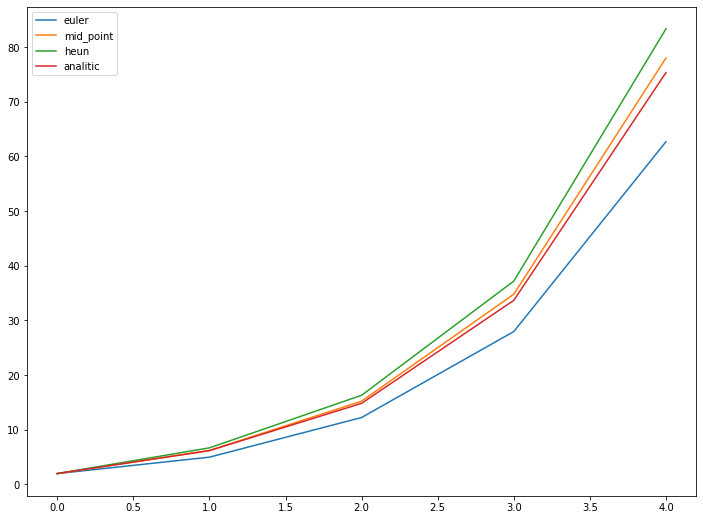

In [108]:
plt.figure(figsize=(12,9))

for y in res[1]:
    plt.plot(res[0], y[:-1], label=y[-1] )

y_exact = list(map(y_analitic, res[0]))
plt.plot(res[0], y_exact, label='analitic')
plt.legend()
plt.show()

Reduzindo o tamanho dos passos

In [109]:
res = compare(func, 0, 2, 4, 0.5)

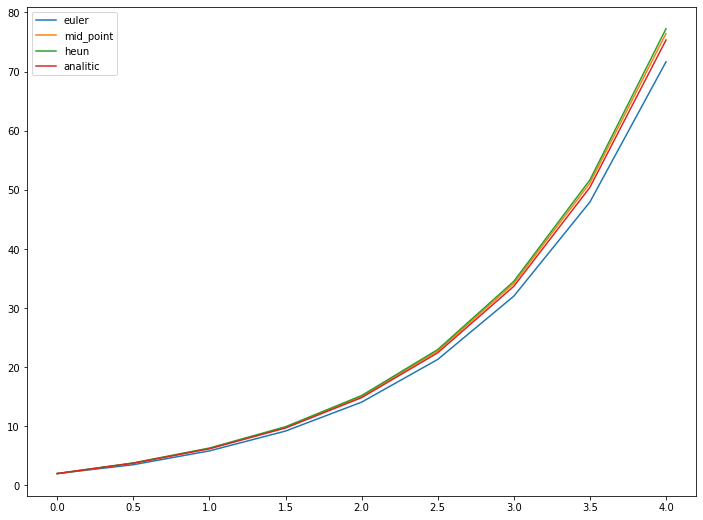

In [110]:
plt.figure(figsize=(12,9))

for y in res[1]:
    plt.plot(res[0], y[:-1], label=y[-1] )

y_exact = list(map(y_analitic, res[0]))
plt.plot(res[0], y_exact, label='analitic')
plt.legend()
plt.show()

## Métodos de Runge-Kutta

Os métodos de `Runge-Kutta (RK)` alcançam a acurácia de uma abordagem por série de Taylor sem exigir cálculos de derivadas de ordem superior. Há muitas variações, mas todas podem ser postas na forma geral

$$y_{i+1} = y_i + \phi(x_i, y_i)h$$

em que $\phi(x_i, y_i, h)$ é chamada função incremento, a qual pode ser interpretada como representativa da inclinação em um intervalo. A função incremento pode ser escrita na
forma geral

$$\phi = a_1k_1 + a_2 k_2 +...+ a_n k_n $$

em que os $a$’s são constantes e os $k$’s são

\begin{align}
k_1 &= f(x_i, y_i)\\
k_2 &= (x_i + p_1 h, y_i + q_{11}k_1 h)\\
k_3 &= (x_i + p_2 h, y_i + q_{21}k_1 h + q_{22}k_2 h)\\
.\\
.\\
.\\
k_n &= (x_i + p_{n-1} h, y_i + q_{n-1,1}k_1 h + q_{n-1,2}k_2 h + ... + q_{n-1,n-1}k_{n-1} h)
\end{align}

em que os $p$’s e os $q$’s são constantes. Observe que os $k$’s são relações de recorrência. Isto é, k1 aparece na equação para $k_2$, o qual aparece na equação para $k_3$, e assim por diante. Como cada $k$ é um cálculo da função, essa recorrência torna os métodos RK eficientes
para cálculos computacionais.

Vários tipos de métodos de Runge-Kutta podem ser deduzidos usando-se um número diferente de termos na função incremento, conforme especificado por $n$. Observe que o método RK de primeira ordem com $n = 1$ é, na realidade, o método de Euler. Uma vez que n seja escolhido, os valores para os $a$’s, os $p$’s e os $q$’s são calculados igualando-se a equação principal a termos da expansão em série de Taylor. Logo, pelo menos para as versões de ordem mais baixa, o número de termos, $n$, usualmente representa a ordem da abordagem. Por exemplo, na próxima seção, os métodos RK de segunda ordem usam uma função incremento com dois termos $(n = 2)$. Tais métodos de segunda ordem serão exatos se a solução da equação diferencial for quadrática. Além disso, como os termos com $h^3$ e com grau mais alto foram desprezados durante a dedução,
o erro de truncamento local é $\mathcal{O}(h^3)$ e o erro global é $\mathcal{O}(h^2)$. Nas seções subsequentes, serão desenvolvidos os métodos RK de terceira e quarta ordens ($n = 3$ e $4$, respectivamente), casos nos quais os erros de truncamento globais são $\mathcal{O}(h^3)$ e $\mathcal{O}(h^4)$, respectivamente.

### Métodos de Runge-Kutta de Segunda Ordem

A versão de segunda ordem da equação geral do método de RK é

$$y_{i+1} = y_i + (a_1k_1 + a_2k_2)h$$

em que

\begin{align}
k1 &= f(x_i, y_i)\\
k_2 &= (x_i + p_1 h, y_i + q_{11}k_1 h) 
\end{align}

Os valores $a_1$, $a_2$, $p_1$ e $q_{11}$ são calculados igualando-se a equação acima à expansão em série de Taylor até os termos de $2^o$ grau.

<p align="center">
<img src="./images/9-rk2.png" width=850 height=800 />
</p>

Fazendo isso, deduzimos três equações para calcular as quatro constantes desconhecidas. As três equações são

\begin{align}
a_1 + a_2 &= 1\\
a_2 p_1 &= \frac{1}{2}\\
a_2 q_{11} &= \frac{1}{2}
\end{align}

Como temos três equações com quatro incógnitas, devemos escolher um valor para
uma das incógnitas para determinar as outras três. Suponha que especifiquemos um valor
para $a_2$. Então, as equações acima podem ser resolvidas simultaneamente por

\begin{align}
a_1 &= 1- a_2 \\
p_1 &= q_{11} = \frac{1}{2a_2}
\end{align}

Como podemos escolher um número infinito de valores para $a_2$, existe um número
infinito de métodos RK de segunda ordem. Cada versão forneceria exatamente o mesmo
resultado se a solução da EDO fosse quadrática, linear ou constante. Entretanto, elas
fornecem resultados diferentes quando (como é o caso típico) a solução é mais complicada. Apresentamos três das versões usadas mais freqüentemente e preferidas:

#### Método de Heun com um Único Corretor $(a_2 = \frac{1}{2})$

Se for suposto que $a_2 = \frac{1}{2}$, as equações podem ser resolvidas por $a_1 = 1/2$ e $p1 = q_{11} = 1$. Esses parâmetros, quando substituídos na equação principal, fornecem

$$y_{i+1} = y_i + (\frac{1}{2}k_1 + \frac{1}{2}k_2)h$$

em que

\begin{align}
k1 &= f(x_i, y_i)\\
k_2 &= (x_i + h, y_i + k_1 h) 
\end{align}

Observe que $k_1$ é a inclinação no início do intervalo e $k_2$ é a inclinação no final do intervalo. Consequentemente, esse método de segunda ordem de Runge-Kutta é, na realidade,
a técnica de Heun sem iteração!

#### O Método do Ponto Médio $(a_2 = 1)$

Se for suposto que $a_2$ é 1, então $a_1 = 0, p_1 =
q_{11} = \frac{1}{2}$, e a equação principal se torna

$$y_{i+1} = y_i + k_2 h$$

em que 
\begin{align}
k_1 &= f(x_i, y_i)\\
k_2 &= (x_i + \frac{1}{2} h, y_i + \frac{1}{2} k_1 h) 
\end{align}

Esse é o método do ponto médio.

#### Método de Ralston ($a_2 = \frac{2}{3}$)

Ralston (1962) e Ralston e Rabinowitz (1978) determinaram que a escolha $a_2 = \frac{2}{3}$ fornece um limitante mínimo para o erro de truncamento para os algoritmos RK de segunda ordem. Para essa versão, $a_1 = \frac{1}{3}$ e $p_1 = q_{11} = \frac{3}{4}$, e obtém-se

$$y_{i+1} = y_i + (\frac{1}{3} k_1 + \frac{2}{3} k_2)h$$

em que 
\begin{align}
k_1 &= f(x_i, y_i)\\
k_2 &= (x_i + \frac{3}{4} h, y_i + \frac{3}{4} k_1 h) 
\end{align}

#### **Exemplo:**
Use o método do ponto médio e o método
de Ralston para integrar numericamente a equação

$$f(x,y) = -2x^3 + 12 x^2 - 20x + 8.5$$

de $x = 0$ a $x = 4$ usando um tamanho de passo de $0.5$. A condição inicial em $x = 0$ é
$y = 1$. Compare os resultados com os valores obtidos usando um outro algoritmo RK de
segunda ordem, isto é, o método de Heun sem iteração do corretor. Tambem com o resultado analitico e o metodo de Euler.

### Métodos de Runge-Kutta de Terceira Ordem

Para $n = 3$, a dedução é parecida com a dos métodos de segunda ordem. O resultado dessa
dedução é um conjunto de seis equações com oito incógnitas. Portanto, devem ser especificados valores *a priori* para duas das incógnitas para determinar os parâmetros restantes. Uma versão comum que resulta é

$$
y_{i+1} = y_i + \frac{1}{6}(k_1 + 4k_2 + k3)h
$$

em que

\begin{align}
k_1 &= f(x_i, y_i)\\
k_2 &= f(x_i + \frac{1}{2} h, y_i + \frac{1}{2}k_1 h)\\
k_3 &= f(x_i, y_i - k_1h + 2k_2 h)
\end{align}

Observe que, se a derivada for uma função apenas de $x$, o método de terceira ordem
se reduz à regra `1/3 de Simpson`. Ralston (1962) e Ralston e Rabinowitz (1978) desenvolveram uma versão alternativa que fornece um limitante mínimo para o erro de truncamento. De qualquer modo, os métodos RK de terceira ordem têm erros local e global de $\mathcal{O}(h^4)$ e $\mathcal{O}(h^3)$, respectivamente, e fornecem resultados exatos se a solução for uma função
cúbica. Tratando-se de polinômios, a equação acima também será exata quando a equação diferencial for uma função cúbica e a solução for de quarto grau, porque a regra 1/3 de Simpson fornece estimativas exatas da integral para funções cúbicas.

### Métodos de Runge-Kutta de Quarta Ordem

Os métodos RK mais populares são os de quarta ordem. Como no caso das abordagens de
segunda ordem, existe um número infinito de versões. A seguinte é a forma mais comumente usada e, assim, a chamamos `método RK de quarta ordem clássico`:

$$
y_{i+1} = y_i + \frac{1}{6}(k_1 + 2k_2 + 2k3 + k_4)h
$$

em que

\begin{align}
k_1 &= f(x_i, y_i)\\
k_2 &= f(x_i + \frac{1}{2} h, y_i + \frac{1}{2}k_1 h)\\
k_3 &= f(x_i + \frac{1}{2} h, y_i + \frac{1}{2}k_2 h)\\
k_4 &= f(x_i, y_i + k_3h)
\end{align}

Observe que para EDOs que são uma função apenas de $x$, o método RK de quarta
ordem clássico é parecido com a `regra 1/3 de Simpson`. Além disso, o método RK de
quarta ordem é parecido com a abordagem de Heun no fato que são desenvolvidas
múltiplas estimativas da inclinação para se chegar a uma inclinação média melhorada
no intervalo. Como descrito na figura abaixo, cada um dos $k$’s representa uma inclinação.
Então, a equação acima representa uma média ponderada delas para chegar a uma
inclinação melhorada.

<p align="center">
<img src="./images/9-rk4.png" width=450 height=400 />
</p>


#### Exemplo


* (a) Use o método RK de quarta ordem clássico para integrar $$f(x, y) = −2x^3 + 12x^2 − 20x + 8.5$$ 
utilizando um tamanho de passo de $h = 0.5$ e uma condição inicial de $y = 1$ em $x = 0$.

* (b) Analogamente, integre $$f(x, y) = 4e^{0.8x} − 0.5y$$
usando $h = 0.5$ com $y(0) = 2$ de x = $0$ a $0.5$.

